In [1]:
#importing pandas library
import pandas as pd

In [2]:
#loading  dataset into car variable
car=pd.read_csv('car_evaluation.csv.xls')

In [3]:
#getting top 5 entries using head()
car.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [4]:
#taking column name as per their entries
car.columns=['buy','maintenance','doors','persons','lugboot','safety','value']

In [5]:
#importing seaborn and matplot library
import seaborn as sns
import matplotlib as plt

In [6]:
#getting information regarding no. of rows and columns and its datatypes;presence of any null values
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   buy          1727 non-null   object
 1   maintenance  1727 non-null   object
 2   doors        1727 non-null   object
 3   persons      1727 non-null   object
 4   lugboot      1727 non-null   object
 5   safety       1727 non-null   object
 6   value        1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [7]:
car

,buy,maintenance,doors,persons,lugboot,safety,value
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [8]:
car.describe().T

,count,unique,top,freq
buy,1727,4,high,432
maintenance,1727,4,high,432
doors,1727,4,3,432
persons,1727,3,4,576
lugboot,1727,3,med,576
safety,1727,3,med,576
value,1727,4,unacc,1209


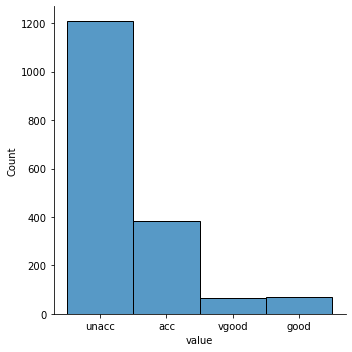

In [9]:
#getting count for differnt values of car using displot of seaborn
sns.displot(car['value'])

<AxesSubplot:title={'center':'Count (target)'}>

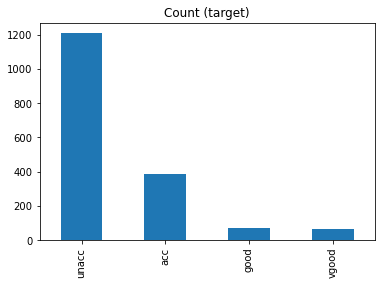

In [10]:
car.value.value_counts().plot(kind='bar', title='Count (target)')


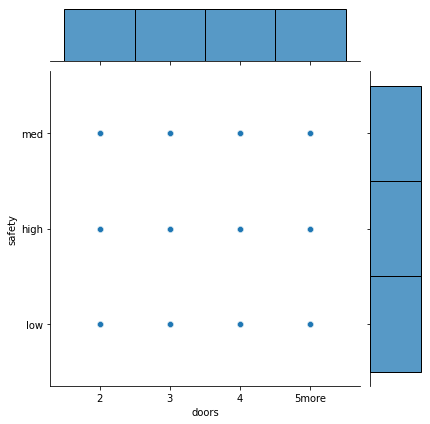

In [11]:
#plotting jointplot for dependence of safety on the basis of doors
sns.jointplot(x='doors',y='safety',data=car)

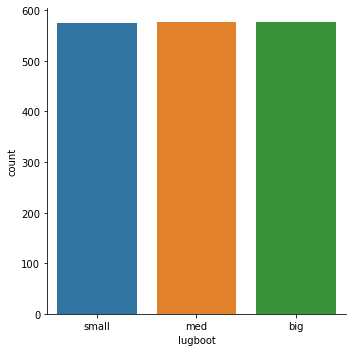

In [12]:
sns.catplot(x='lugboot',data=car,kind='count')

In [13]:
#importing decision tree classifier and model for train and test
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split


In [14]:
#dividing given data of car into X and y variable
X = car.drop(['value'], axis=1)  #independent variable
y = car['value']                 #dependent variable

In [15]:
#splitting data for training and testing in the ratio 0.75:0.25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 50)


In [16]:
pip install category_encoders


Note: you may need to restart the kernel to use updated packages.


In [17]:
#encoder use for converting categorical value into numerical one.
import category_encoders as ce

In [19]:
encode = ce.OrdinalEncoder(car.columns)


In [20]:
#taking encoded data into
X_train = encode.fit_transform(X_train) #Fit label encoder and return encoded labels.

X_test = encode.transform(X_test)        #Transform labels to normalized encoding

In [22]:
#getting above 10 values using head command
X_train.head(10)

,buy,maintenance,doors,persons,lugboot,safety
153,1,1,1,1,1,1
1407,2,1,2,2,2,1
1488,2,1,3,2,2,1
641,3,1,3,1,2,2
1534,2,2,2,1,2,3
7,1,3,2,2,3,3
785,3,4,1,2,2,2
870,4,3,2,2,3,1
718,3,2,4,3,3,3
852,3,4,3,3,3,1


In [28]:
#using gini criteria
gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=230)


In [29]:
#fitting given data into x_train and y_train
gini.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=230)

In [30]:
y_pred_gini = gini.predict(X_test)

In [31]:
#calculating accuracy of our model on y_test and y_pred_gini(i.e x_test)
from sklearn.metrics import accuracy_score

acc=accuracy_score(y_test, y_pred_gini)

In [32]:
acc

0.7685185185185185

In [33]:
y_pred_train_gini = gini.predict(X_train)

In [34]:
accuracy_score(y_train, y_pred_train_gini)

0.7760617760617761

In [ ]:
#our accuracy on y_train and y_test is nearabout same using gini criteria

In [35]:
#using entropy criteria 
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


In [36]:
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [37]:
y_pred_en = clf_en.predict(X_test)

In [38]:
accuracy_score(y_test, y_pred_en)

0.7708333333333334

In [39]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array(['unacc', 'unacc', 'unacc', ..., 'unacc', 'acc', 'unacc'],
      dtype=object)

In [41]:
accuracy_score(y_train, y_pred_train_en)

0.7683397683397684

In [ ]:
#our accuracy on y_train and y_test is also nearabout same using entropy criteria

In [42]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)


In [43]:
cm

array([[ 45,   0,  49,   0],
       [  8,   0,   6,   0],
       [ 22,   0, 288,   0],
       [ 14,   0,   0,   0]], dtype=int64)

In [44]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

         acc       0.51      0.48      0.49        94
        good       0.00      0.00      0.00        14
       unacc       0.84      0.93      0.88       310
       vgood       0.00      0.00      0.00        14

    accuracy                           0.77       432
   macro avg       0.34      0.35      0.34       432
weighted avg       0.71      0.77      0.74       432



C:\Users\ak\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ak\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ak\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
